In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import confusion_matrix, mean_squared_error, f1_score, precision_score, accuracy_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt

In [2]:
def prepare_adult_data():
    adult = pd.read_csv('../datasets/adult.data',
                        names=['age', 'workclass', 'fnlwgt', 'education',
                               'education-num', 'marital-status', 'occupation',
                               'relationship', 'race', 'sex', 'capital-gain',
                               'capital-loss', 'hours-per-week', 'native-country', 'salary'])
    
    # Избавиться от лишних признаков
    adult.drop(['native-country'], axis=1, inplace=True)
    # Сконвертировать целевой столбец в бинарные значения
    adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
    # Сделать one-hot encoding для некоторых признаков
    adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])
    # Нормализовать нуждающиеся в этом признаки
    a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']]
    norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
    adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features
    
    # Разбить таблицу данных на матрицы X и y
    X = adult[list(set(adult.columns) - set(['salary']))]
    y = adult['salary']

    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [3]:
X, y = prepare_adult_data()
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2)

In [4]:
model = LogisticRegression()
model.fit(X, y)
Y_pred = model.predict(X)
print(f1_score(y,Y_pred))
confusion_matrix(y, Y_pred)

0.6621280179674339


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[23030,  1690],
       [ 3124,  4717]])

In [5]:
#model = LogisticRegression()
#model.fit(X_train, Y_train)

#Y_predicted = model.predict(X_val)
#print(accuracy_score(Y_val,Y_predicted))
#print(precision_score(Y_val,Y_predicted))
#print(recall_score(Y_val,Y_predicted))
#print(f1_score(Y_val,Y_predicted))


In [6]:
# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    print(fpr, tpr)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print(roc_auc)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

[0.         0.         0.         ... 0.99526699 0.99538835 1.        ] [0.00000000e+00 1.27534753e-04 2.55069506e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
0.9078274635359981


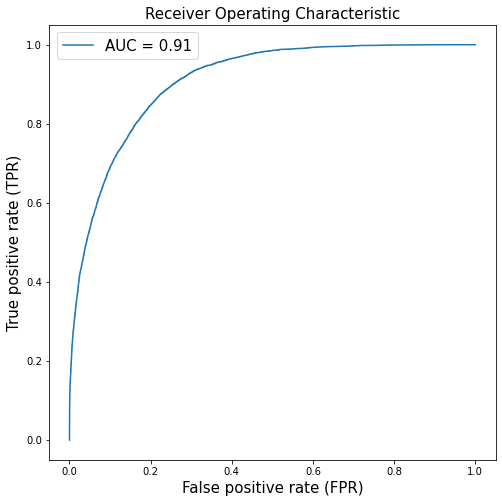

In [7]:
Y_pred_proba = model.predict_proba(X)
calc_and_plot_roc(y, Y_pred_proba[:,1])

In [8]:
model_no_regul = LogisticRegression(penalty='none', solver="newton-cg")
model.fit(X, y)
Y_pred_no_regul = model.predict(X)
print(f1_score(y,Y_pred_no_regul))
confusion_matrix(y, Y_pred_no_regul)

0.6621280179674339


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[23030,  1690],
       [ 3124,  4717]])

In [12]:
def do_optimize(x_data, y_data, l2=0.01):
    model = LogisticRegression(C=l2,solver="newton-cg", penalty='l2')
    model.fit(x_data, y_data)
    Y_pred = model.predict(X)
    return f1_score(y,Y_pred)

fmax = 0.0
cmax = 0.01
for c in np.arange(0.01,1.0,0.01):
    f = do_optimize(X, y, c)
    if f > fmax: 
        fmax = f
        cmax = c
print(fmax, cmax) 

0.6620350877192983 0.97


In [45]:
def prepare_adult_data_other():
    adult = pd.read_csv('../datasets/adult.data',
                        names=['age', 'workclass', 'fnlwgt', 'education',
                               'education-num', 'marital-status', 'occupation',
                               'relationship', 'race', 'sex', 'capital-gain',
                               'capital-loss', 'hours-per-week', 'native-country', 'salary'])
    
    # Избавиться от лишних признаков
    #adult.drop(['native-country'], axis=1, inplace=True)
    # Сконвертировать целевой столбец в бинарные значения
    adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
    # Сделать one-hot encoding для некоторых признаков
    adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])
    # Нормализовать нуждающиеся в этом признаки
    a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']]
    norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
    adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features
    not_top_countries = [x for x,y in zip(adult['native-country'].value_counts().index,list(adult['native-country'].value_counts())) if y<=100]
    adult.loc[adult['native-country'].isin(not_top_countries),'native-country'] = 'other'
    adult = pd.get_dummies(adult, columns=['native-country'])
    
    
    # Разбить таблицу данных на матрицы X и y
    X = adult[list(set(adult.columns) - set(['salary']))]
    y = adult['salary']

    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [46]:
Xo, yo = prepare_adult_data_other()
model = LogisticRegression()
model.fit(Xo, yo)
Yo_pred = model.predict(Xo)
print(f1_score(yo,Yo_pred))

            age    fnlwgt  education-num  capital-gain  capital-loss  \
0      0.030670 -1.063594       1.134721      0.148451     -0.216656   
1      0.837096 -1.008692       1.134721     -0.145918     -0.216656   
2     -0.042641  0.245075      -0.420053     -0.145918     -0.216656   
3      1.057031  0.425795      -1.197440     -0.145918     -0.216656   
4     -0.775756  1.408154       1.134721     -0.145918     -0.216656   
...         ...       ...            ...           ...           ...   
32556 -0.849067  0.639731       0.746028     -0.145918     -0.216656   
32557  0.103982 -0.335428      -0.420053     -0.145918     -0.216656   
32558  1.423588 -0.358772      -0.420053     -0.145918     -0.216656   
32559 -1.215625  0.110958      -0.420053     -0.145918     -0.216656   
32560  0.983719  0.929878      -0.420053      1.888395     -0.216656   

       hours-per-week  salary  workclass_ ?  workclass_ Federal-gov  \
0           -0.035429       0             0                     

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
